<a href="https://colab.research.google.com/github/henriquebap/Disruptive-Architectures-IA-e-IoT/blob/main/material/aulas/IA/lab02/classificador-knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objetivos

  - Apresentar e utilizar o classificador k-nearest neighbours (kNN)
  - Apresentar a técnica de separação de dados (treino e teste)
  - Avaliar Aprendizagem do modelo

  

## Começando

Vamos dar continuidade ao nosso estudo de aprendizagem de máquina, já vimos:

 - Tudo começa, conhecendo os dados disponíveis.
 - Como carregar um data frame
 - Como visualizar os dados em gráficos (histograma, box plot, violin plot, matriz de confusão)
 - Fizemos uma breve introdução sobre análise exploratória buscando correlacionar os dados para gerar informações.

 Hoje, vamos seguir nossa jornada e finalizar nosso estudo aplicando a técnica de KNN.



## k-Nearest Neighbors

O KNN(K vizinhos mais próximos) é considerado um dos algoritmos mais simples dentro da categoria de ***aprendizagem supervisionada*** sendo muito utilizado para problemas de classificação, porém também pode ser utilizado em problemas de regressão.

***Problemas de classificação*** = Vale lembrar que em problemas de classificação não estamos interessados em valores exatos, queremos apenas saber se um dado pertence ou não a uma dada classe.

### Uma intuição sobre o método

Para realizar a classificação o KNN calcula a distância objeto desconhecido (target) para todos os outros elementos, encontra os mais K vizinhos mais próximos faz uma contagem dos rótulos e considera que o objeto desconhecido pertence ao rótulo de maior contagem.

A imagem abaixo exemplifica o funcionamento, mas se ficou um pouco complicado de entender, rode o script python ***iknn.py*** e faça algumas simulações para compreender.



![knn](/aulas/lab02/knn.png)
<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab02/knn.png?raw=1">



## Bora lá!!

Vamos juntos realizar nosso primeiro projeto, do começo ao fim, de aprendizagem de máquina.



## Definição do problema

A primeira coisa que precisamos fazer é a definição do problema. Neste primeiro caso vamos trabalhar com o mesmo dataset da última aula, dataset iris. Vamos desenvolver um sistema de machine learning capaz de classificar sua espécie com base nos dimensionais da pétala.



São 150 exemplares de flor de íris, pertencentes a três espécies diferentes: **setosa**, **versicolor** e **virginica**, sendo 50 amostras de cada espécie. Os atributos de largura e comprimento de sépala e largura e comprimento de pétala de cada flor fooram medidos manualmente.

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png">

### Desafio 1

Do ponto de vista de machine learning, que problema é esse:

    Aprendizado supervisionado ou não-supervisionado?

R: # Aprendizado Suoper visionado


    Classificação ou regressão?

R:# Classificacao


In [ ]:
# Inicializção das bibliotecas
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Caminho do arquivo
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Define o nome das colunas
header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
# Lê e carrega o arquivo para a memória
df = pd.read_csv(url, header=None, names=header)

In [ ]:
# Retorna um trecho com as 5 primeiras linhas do dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# Mostra informações sobre o dataframe em si
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# class distribution
print(df.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Desafio 2

Aplique os métodos que achar conveniente (vimos algumas opções na última aula) para visualizar os dados de forma gráfica.


In [ ]:
import seaborn as sns


In [ ]:
# Violin plot
g = sns.violinplot(y='species', x='sepal_length', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='sepal_width', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_length', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_width', data=df, inner='quartile')
plt.show()

In [ ]:
# Os mesmos dados mas agora cada classe de uma cor diferente

colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}

plt.scatter(df['sepal_length'], df['petal_length'], c=df['species'].map(colors), label=colors)

plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors.values()], labels=colors.keys())
plt.show()

In [ ]:
sns.pairplot(df, hue='species', height=5)

plt.show()

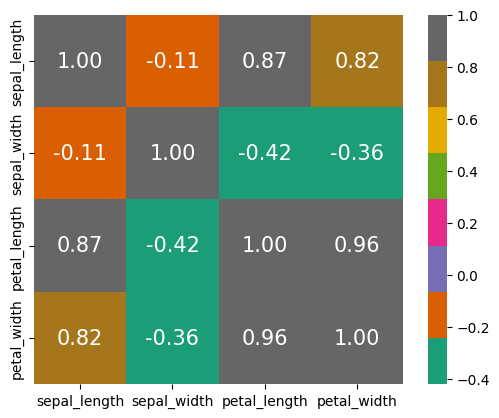

In [ ]:
cols = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
corr_matx = df[cols].corr()

heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap='Dark2')

## PARE!!!

A análise feita no desafio 2 é uma das etapas mais importantes. Caso você tenha pulado essa etapa, volte e faça suas análises.

Com essa etapa concluída, vamos criar um sub-dataset com os atributos que serão utilizados.


In [ ]:
# Selecionando um sub-dataframe com os campos petal_length e petal_width,
# e outro com a variável de classes
entradas = df[['petal_length', 'petal_width']]
classes = df['species']
print(f"Formato das tabelas de dados {entradas.shape} e classes {classes.shape}")

Formato das tabelas de dados (150, 2) e classes (150,)


## Dividindo os dados em conjunto de treinamento e de testes

Dividir nosso dataset em dois conjuntos de dados.
    
    Treinamento - Representa 80% das amostras do conjunto de dados original,
    Teste - com 20% das amostras

Vamos escolher aleatoriamente algumas amostras do conjunto original. Isto pode ser feito com Scikit-Learn usando a função ***train_test_split()***

***scikit-learn***: pip3 install scikit-learn



In [ ]:
# Separamos 20% para o teste
from sklearn.model_selection import train_test_split

entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")

Formato das tabelas de dados de treino (120, 2) e teste (30, 2)


In [ ]:
#Primeiras linhas do dataframe
entradas_treino.head()

,petal_length,petal_width
88,4.1,1.3
105,6.6,2.1
48,1.5,0.2
113,5.0,2.0
0,1.4,0.2


In [ ]:
classes_treino.head()

98    Iris-versicolor
66    Iris-versicolor
2         Iris-setosa
21        Iris-setosa
83    Iris-versicolor
Name: species, dtype: object

## Chegou a hora de aplicar o modelo preditivo

Treinar um modelo no python é simples se usar o Scikit-Learn.
Treinar um modelo no Scikit-Learn é simples: basta criar o classificador, e chamar o método fit().

Uma observação sobre a sintaxe dos classificadores do `scikit-learn`
- O método `fit(X,Y)` recebe uma matriz ou dataframe X onde cada linha é uma amostra de aprendizado, e um array Y contendo as saídas esperadas do classificador, seja na forma de texto ou de inteiros
- O método `predict(X)` recebe uma matriz ou dataframe X onde cada linha é uma amostra de teste, retornando um array de classes



In [ ]:
# Importa a biblioteca
from sklearn.neighbors import KNeighborsClassifier

# Cria o classificar KNN
k = 9
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
modelo.fit(entradas_treino, classes_treino)




KNeighborsClassifier(n_neighbors=9)

Pronto!! bora testar se esta funcionando....


In [ ]:
# Para obter as previsões, basta chamar o método predict()
classes_encontradas = modelo.predict(entradas_teste)
print("Predição: {}".format(classes_encontradas))

Predição: ['Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica']


In [ ]:
# Para determinar a quantidade de acertos (acuracia)

from sklearn.metrics import accuracy_score
acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acerto médio de classificação: ", acertos)


Acerto médio de classificação:  0.9333333333333333


## Utilizando o modelo treinado com amostras fora do dataset

Vamos colocar alguns valores e ver a predição do classificador.

In [ ]:
# Criamos um modelo utilizando duas entradas e uma saida, logo temos que passar duas entradas para o modelo faça a predição.

modelo.predict([[3.3, 3.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

## Visualizando o modelo de forma gráfica

In [ ]:
# Unificamos os dados de entrada e as classes de treino e teste em um daframe cada
df_treino = pd.concat((entradas_treino, classes_treino), axis=1)

novas_classes = pd.Series(classes_encontradas, name="species", index=entradas_teste.index)
df_teste = pd.concat((entradas_teste, novas_classes), axis=1)

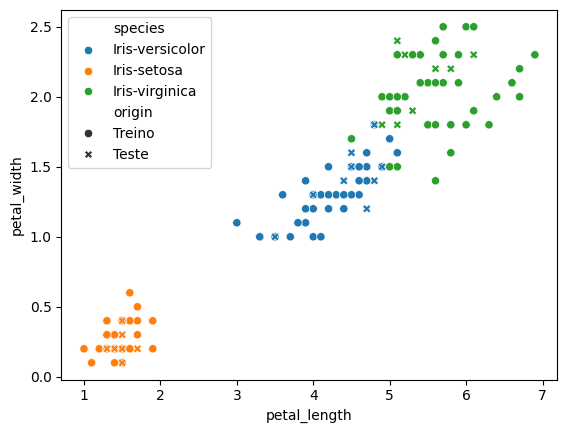

In [ ]:
import seaborn as sns

novo_df = pd.concat((df_treino, df_teste), keys=['train', 'test'])
novo_df['origin'] = ''
novo_df.loc['train', 'origin'] = 'Treino'
novo_df.loc['test', 'origin'] = 'Teste'

# Use scatterplot from seaborn, specifying markers based on the data origin
sns.scatterplot(x='petal_length', y='petal_width', hue='species', style='origin', data=novo_df)

plt.show()


### Desafio 3

Fizemos o treinamento para k=3, mude o valor de k e análise a acurácia do modelo.

Dica: Faça um loop for que varre um range de k, a saída pode ser armazenada em uma lista. No final do loop exiba em um gráfico.



In [ ]:
# Importa a biblioteca
from sklearn.neighbors import KNeighborsClassifier

# Cria o classificar KNN
k = 5
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
modelo.fit(entradas_treino, classes_treino)




KNeighborsClassifier()

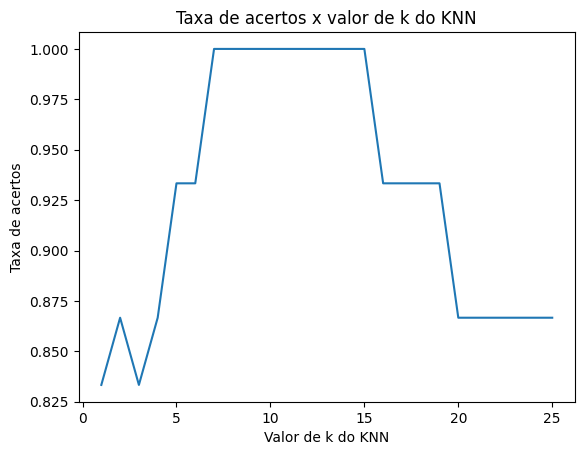

In [ ]:
#### Resposta loop for para diferntes k
k_range = list(range(1,26))
acertos = []
for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(entradas_treino, classes_treino)
    classes_encontradas = modelo.predict(entradas_teste)
    acertos.append(accuracy_score(classes_teste, classes_encontradas))


plt.plot(k_range, acertos)
plt.xlabel('Valor de k do KNN')
plt.ylabel('Taxa de acertos')
plt.title('Taxa de acertos x valor de k do KNN')
plt.show()


### Desafio 4

Refaça os notebook substituindo as entradas (variaveis independentes) e analise se o modelo obtido ficou melhor ou pior.




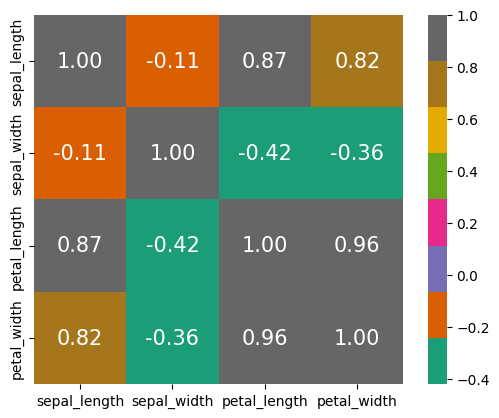

In [ ]:
cols = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
corr_matx = df[cols].corr()

heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap='Dark2')

In [ ]:
# Selecionando um sub-dataframe com os campos petal_length e petal_width,
# e outro com a variável de classes
entradas_2 = df[['sepal_width', 'sepal_length']]
classes_2 = df['species']
print(f"Formato das tabelas de dados {entradas_2.shape} e classes {classes_2.shape}")

Formato das tabelas de dados (150, 2) e classes (150,)


In [ ]:
entradas_treino_2, entradas_teste_2, classes_treino_2, classes_teste_2 = train_test_split(entradas_2, classes_2, test_size=0.2)


In [ ]:
# Importa a biblioteca
from sklearn.neighbors import KNeighborsClassifier

# Cria o classificar KNN
k = 9
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
modelo.fit(entradas_treino_2, classes_treino_2)


KNeighborsClassifier(n_neighbors=9)

In [ ]:
classes_encontradas = modelo.predict(entradas_teste_2)
print("Predição: {}".format(classes_encontradas))

Predição: ['Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica']


In [ ]:
acertos = accuracy_score(classes_teste_2, classes_encontradas)
print("Acerto médio de classificação: ", acertos)


Acerto médio de classificação:  0.7333333333333333


In [ ]:
modelo.predict([[3.3, 3.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [ ]:
# Unificamos os dados de entrada e as classes de treino e teste em um daframe cada
df_treino_2 = pd.concat((entradas_treino_2, classes_treino_2), axis=1)

novas_classes_2 = pd.Series(classes_encontradas, name="species", index=entradas_teste.index)
df_teste_2 = pd.concat((entradas_teste_2, novas_classes), axis=1)

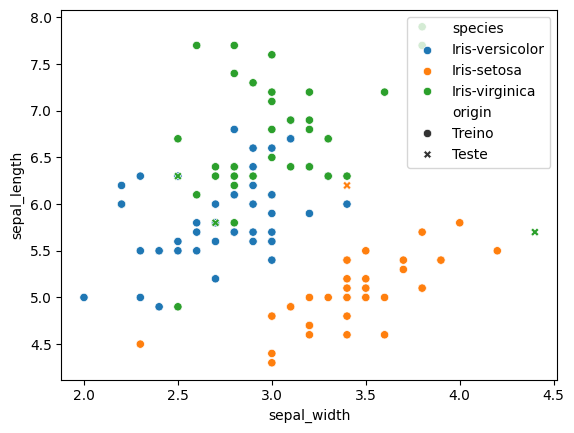

In [ ]:

novo_df_2 = pd.concat((df_treino_2, df_teste_2), keys=['train', 'test'])
novo_df_2['origin'] = ''
novo_df_2.loc['train', 'origin'] = 'Treino'
novo_df_2.loc['test', 'origin'] = 'Teste'

# Use scatterplot from seaborn, specifying markers based on the data origin
sns.scatterplot(x='sepal_width', y='sepal_length', hue='species', style='origin', data=novo_df_2)

plt.show()


In [ ]:
from sklearn.metrics import classification_report

y_predicoes = modelo.predict(entradas_treino_2)

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(classes_treino_2, y_predicoes))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.84      0.82      0.83        44
 Iris-virginica       0.79      0.81      0.80        37

       accuracy                           0.88       120
      macro avg       0.88      0.88      0.88       120
   weighted avg       0.88      0.88      0.88       120



### Desafio 5

Lembra o dataset 'breast_cancer', faça um modelo de predição que informa se o câncer é maligno ou não.


In [ ]:
#Instalacao para poder importar e utilizar o arquivo
!pip install ucimlrepo

In [ ]:
#FAZENDO A IMPORTACAO DO DATASET DE ACORDO COM O SITE

from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer = fetch_ucirepo(id=14)

# data (as pandas dataframes)
X = breast_cancer.data.features
y = breast_cancer.data.targets

# metadata
print(breast_cancer.metadata)

# variable information
print(breast_cancer.variables)


{'uci_id': 14, 'name': 'Breast Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/14/breast+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/14/data.csv', 'abstract': 'Breast Cancer Data (Restricted Access)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 286, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1988, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C51P4M', 'creators': ['Matjaz Zwitter', 'Milan Soklic'], 'intro_paper': None, 'additional_info': {'summary': 'This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)\r\n\r\nThis data set includes 201 instances of one class and 85 instances of another 

In [ ]:
#Visualizando informacoes
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
dtypes: int64(1), object(8)
memory usage: 20.2+ KB


In [14]:
X.columns = ['age', 'menopause', 'tumor-size', 'inv-nodes','node-caps', 'deg-malig', 'breast', 'breast-quad','irradiat']

In [ ]:
X

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...
281,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,40-49,ge40,30-34,5-Mar,no,3,left,left_low,no


In [ ]:
#Extraindo Informacao
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   286 non-null    object
dtypes: object(1)
memory usage: 2.4+ KB


In [13]:
y.groupby('Class').size()


Class
no-recurrence-events    201
recurrence-events        85
dtype: int64

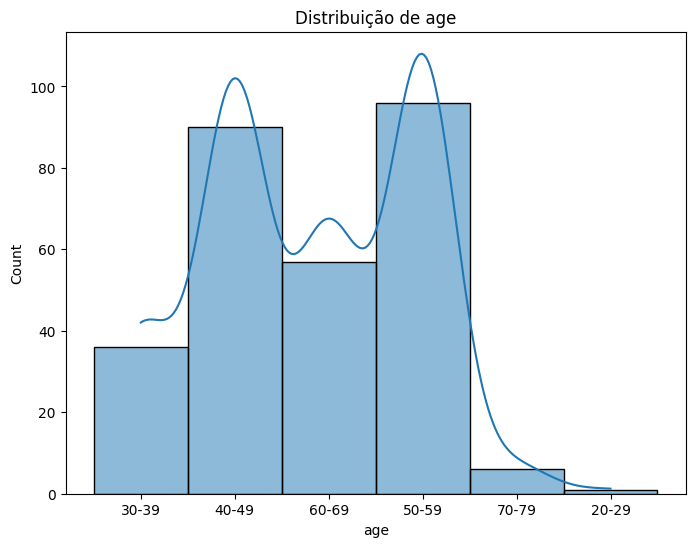

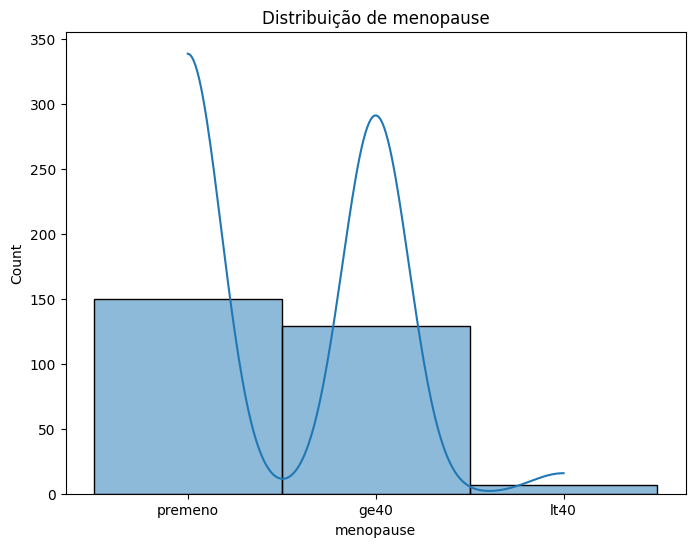

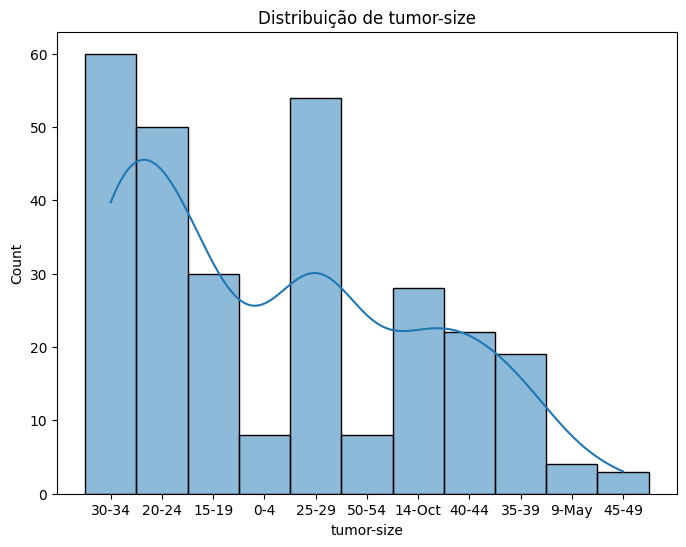

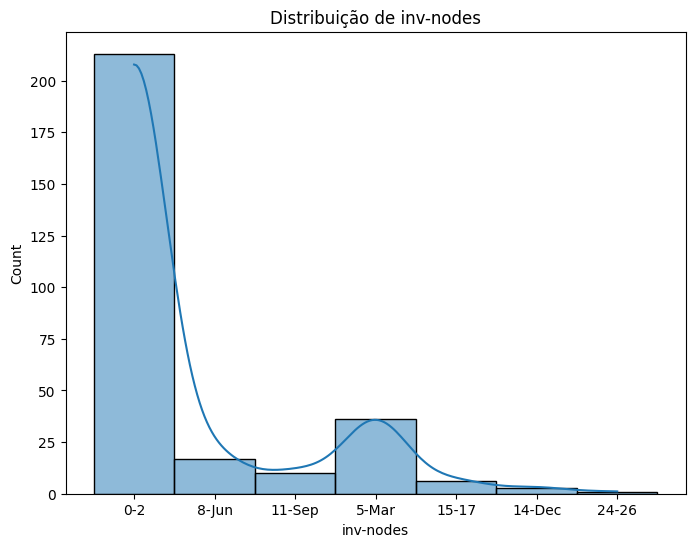

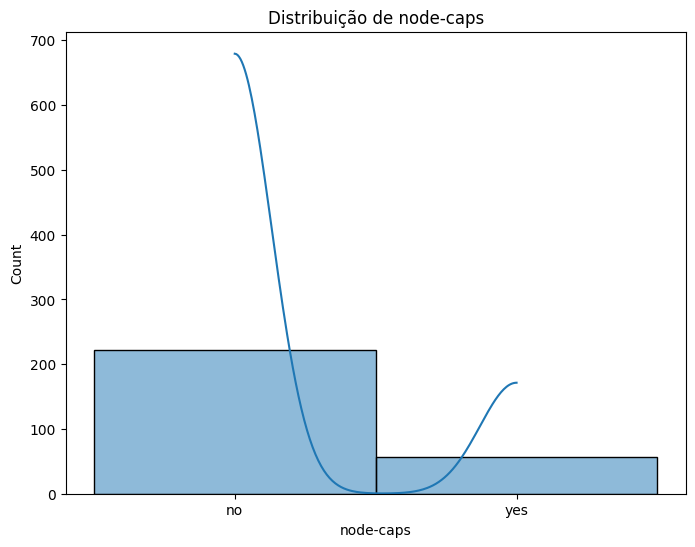

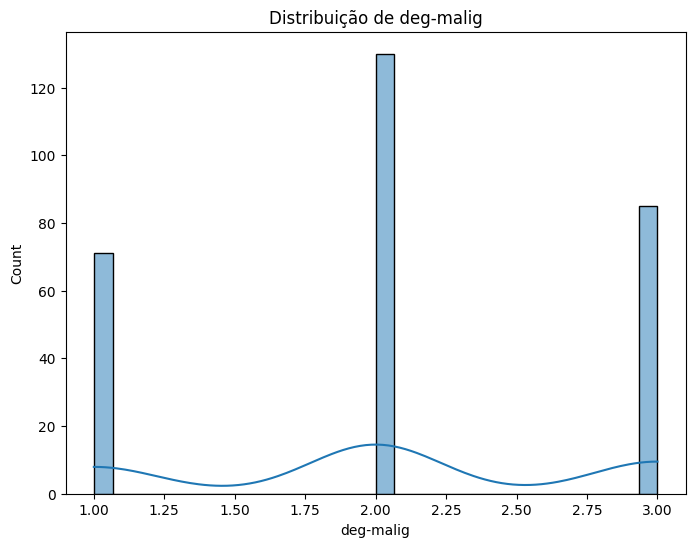

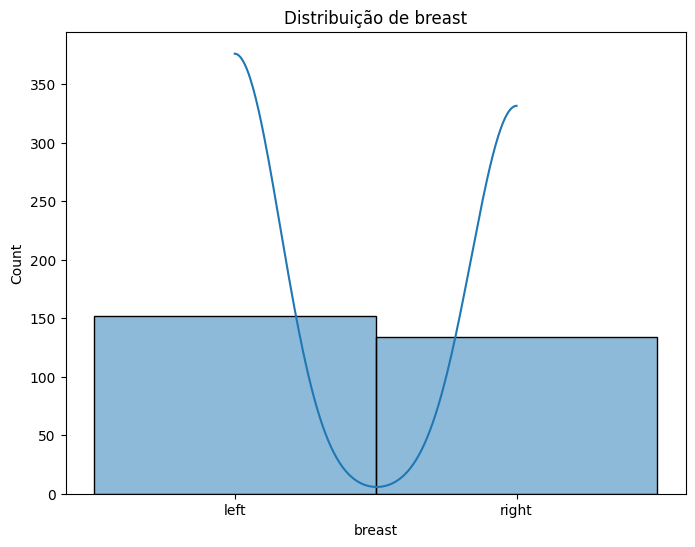

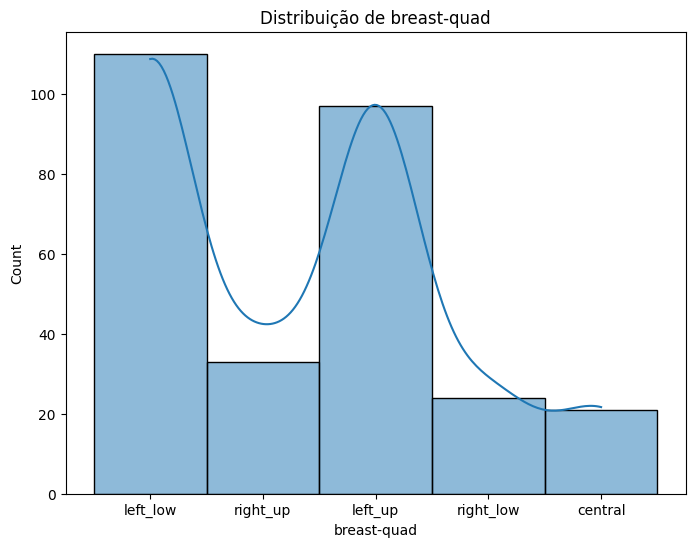

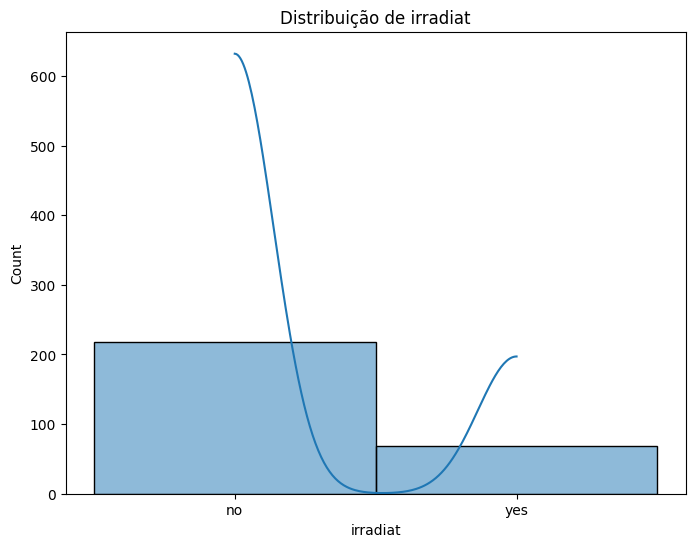

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar distribuição para cada característica
for column in X.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(X[column], bins=30, kde=True)
    plt.title(f'Distribuição de {column}')
    plt.show()


In [15]:
X.isnull().sum()
# o que fazer com valores faltantes? Tirar a moda? Mediana? Como implemnetar isso?

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64

In [21]:
# selected_features = ['deg-malig', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']
selected_features = ['age', 'tumor-size']
entradas = X[selected_features]
classes = y['Class']  # Supondo que 'Class' seja a coluna alvo indicando recorrência ou não
print(f"Formato das tabelas de dados {entradas.shape} e classes {classes.shape}")


Formato das tabelas de dados (286, 2) e classes (286,)


In [26]:
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd

In [27]:
# Convertendo variáveis categóricas em variáveis dummy
X_encoded = pd.get_dummies(X)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializando o classificador Random Forest
rf_classifier = RandomForestClassifier()

# Treinando o modelo
rf_classifier.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
predictions = rf_classifier.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, predictions)
print("Acurácia do modelo:", accuracy)


<ipython-input-27-b76952573f13>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Acurácia do modelo: 0.6896551724137931


In [28]:
from sklearn.metrics import classification_report

y_predicoes = rf_classifier.predict(X_test)

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))


                      precision    recall  f1-score   support

no-recurrence-events       0.69      0.95      0.80        37
   recurrence-events       0.71      0.24      0.36        21

            accuracy                           0.69        58
           macro avg       0.70      0.59      0.58        58
        weighted avg       0.70      0.69      0.64        58

